In [34]:
import pandas
import numpy as np
from lib import f1_score
from lib import kernel_function
from lib import distance_function
from lib import nonParamRegression
import matplotlib.pyplot as plt

In [35]:
def dataset_minmax(ds):
    minmax = []
    for i in range(len(ds[0])):
        min_val = ds[:, i].min()
        max_val = ds[:, i].max()
        minmax.append([min_val, max_val])
    return minmax


def normalize(ds, minmax):
    for row in ds:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [36]:
ds = pandas.read_csv('wine.csv')
y_train = ds['class'].to_numpy()

ds = ds.drop(columns=['class'])

X_train = ds.to_numpy()

normalize(X_train, dataset_minmax(X_train))

y_train_onehot = []
for i in range(len(y_train)):
    arr = [0, 0, 0]
    arr[y_train[i] - 1] = 1
    y_train_onehot.append(arr)

In [37]:
def cut_i_th(arr, i):
    res = []
    for j in range(len(arr)):
        if i == j:
            continue
        res.append(arr[j])
    return res

In [38]:
def getf1(val, d, k, t):
    confusion_matrix = np.zeros((3, 3))
    for i in range(len(X_train)):
        e = X_train[i]
        expected = y_train[i]
        predicted = nonParamRegression(e, cut_i_th(X_train.tolist(), i),
                                       cut_i_th(y_train.tolist(), i),
                                       window_type=t,
                                       window_val=val,
                                       distance=d,
                                       kernel=k)
        confusion_matrix[expected - 1][round(predicted) - 1] += 1
    return f1_score(confusion_matrix)

In [39]:
def getf1_onehot(val, d, k, t):
    confusion_matrix = np.zeros((3, 3))
    for i in range(len(X_train)):
        e = X_train[i]
        predicted = np.zeros(3)
        for j in range(3):
            predicted[j] = nonParamRegression(e, cut_i_th(X_train.tolist(), i),
                                              cut_i_th(np.transpose(y_train_onehot)[j], i),
                                              window_type=t,
                                              window_val=val,
                                              distance=d,
                                              kernel=k)

        exp = y_train[i]
        pr = np.argmax(predicted)
        confusion_matrix[exp - 1][pr] += 1
    return f1_score(confusion_matrix)


In [40]:
f_res_fixed = []
window_val_fixed = []
for val in np.arange(0.1, 3, 0.3):
    window_val_fixed.append(val)
    f_res_fixed.append(getf1(val, 'manhattan', 'uniform', 'fixed'))

In [41]:
f_res_var = []
window_val_var = []
for val in range(1, 10):
    window_val_var.append(val)
    f_res_var.append(getf1(val, 'manhattan', 'uniform', 'variable'))

In [42]:
f_res_onehot_fixed = []
window_val_onehot_fixed = []
for val in np.arange(0.1, 3, 0.3):
    window_val_onehot_fixed.append(val)
    f_res_onehot_fixed.append(getf1_onehot(val, 'manhattan', 'logistic', 'fixed'))

In [43]:
f_res_onehot_var = []
window_val_onehot_var = []
for val in range(1, 10):
    window_val_onehot_var.append(val)
    f_res_onehot_var.append(getf1_onehot(val, 'manhattan', 'logistic', 'variable'))

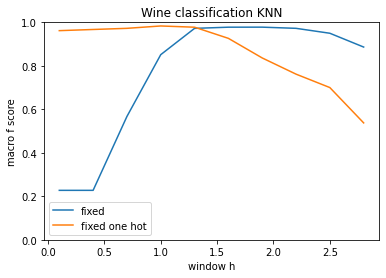

In [44]:
plt.ylim(0, 1)
plt.plot(window_val_fixed, f_res_fixed, label='fixed')
plt.plot(window_val_onehot_fixed, f_res_onehot_fixed, label='fixed one hot')
plt.xlabel('window h')
plt.ylabel('macro f score')
plt.title("Wine classification KNN")
plt.legend()
plt.show()

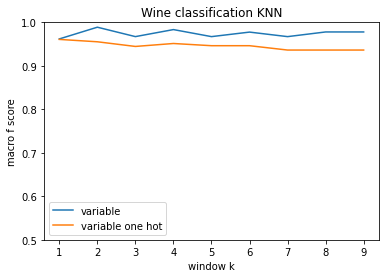

In [45]:
plt.ylim(0.5, 1)
plt.plot(window_val_var, f_res_var, label='variable')
plt.plot(window_val_onehot_var, f_res_onehot_var, label='variable one hot')
plt.xlabel('window k')
plt.ylabel('macro f score')
plt.title("Wine classification KNN")
plt.legend()
plt.show()